In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv(r"C:\Users\AJITESH\Desktop\Day-7\Student_performance_data.csv")
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [4]:
x = df[['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']]
y = df['GradeClass']

In [5]:
x_train,x_test,y_train,y_test = (train_test_split(x,y,test_size = 0.30))

In [6]:
model = DecisionTreeClassifier()

In [7]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
yhat = model.predict(x_test)

In [9]:
cm = confusion_matrix(y_test,yhat)
print(cm)

[[ 17   2   2   3   3]
 [  0  69   3   7   5]
 [  5   3  89   8  10]
 [  9   3   7 100   9]
 [ 11  10  10  14 319]]


<Axes: >

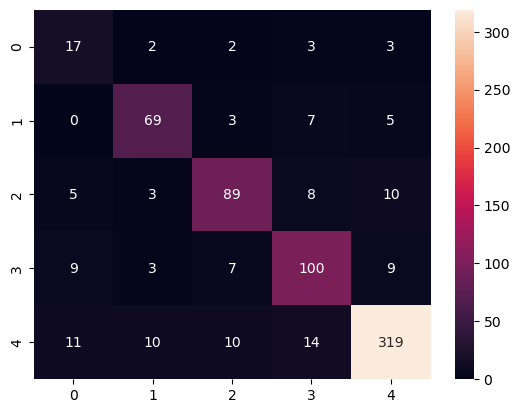

In [10]:
sns.heatmap(cm, annot = True, fmt =  'd')

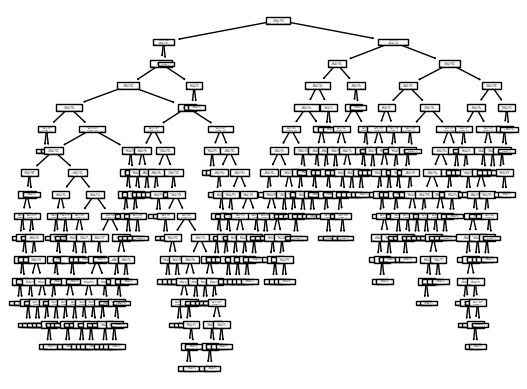

In [11]:
plot_tree(model)
plt.show()

In [24]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [26]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth' : [10,15,25,None],
              'max_leaf_nodes' :[100,150,200, None]}

In [30]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |
 |  Exhaustive search over specified parameter values for an estimator.
 |
 |  Important members are fit, predict.
 |
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |
 |  Read more in the :ref:`User Guide <grid_search>`.
 |
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs

In [34]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, verbose = 1)

In [36]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 25, None],
                         'max_leaf_nodes': [100, 150, 200, None]},
             verbose=1)

In [38]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 100}

In [42]:
grid.best_score_

0.8829296630619357

In [44]:
bestmodel = grid.best_estimator_

In [46]:
yhat = bestmodel.predict(x_test)

In [50]:
cf = classification_report(y_test, yhat)
print(cf)

              precision    recall  f1-score   support

         0.0       0.53      0.63      0.58        27
         1.0       0.91      0.82      0.86        84
         2.0       0.90      0.85      0.88       115
         3.0       0.87      0.82      0.84       128
         4.0       0.93      0.97      0.95       364

    accuracy                           0.89       718
   macro avg       0.83      0.82      0.82       718
weighted avg       0.89      0.89      0.89       718



In [52]:
mod = RandomForestClassifier()

In [56]:
mod.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
yhat1 = mod.predict(x_test)

In [62]:
cm1 = confusion_matrix(y_test, yhat1)
cm1

array([[ 15,   4,   2,   3,   3],
       [  0,  73,   0,   3,   8],
       [  2,   0, 104,   3,   6],
       [  1,   2,   1, 117,   7],
       [  1,   1,   0,   4, 358]], dtype=int64)

In [64]:
cf1 = classification_report(y_test, yhat1)
print(cf1)

              precision    recall  f1-score   support

         0.0       0.79      0.56      0.65        27
         1.0       0.91      0.87      0.89        84
         2.0       0.97      0.90      0.94       115
         3.0       0.90      0.91      0.91       128
         4.0       0.94      0.98      0.96       364

    accuracy                           0.93       718
   macro avg       0.90      0.85      0.87       718
weighted avg       0.93      0.93      0.93       718



In [66]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if

In [80]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split':[2]}

In [82]:
grid1 = GridSearchCV(estimator=mod, param_grid=param_grid, cv = 5, verbose = 1) 

In [84]:
grid1.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2]},
             verbose=1)

In [86]:
grid1.best_params_

{'criterion': 'gini', 'min_samples_split': 2}

In [88]:
grid1.best_score_

0.9163750111716864

In [90]:
bestmodel1 = grid.best_estimator_

In [92]:
yhat1 = bestmodel1.predict(x_test)

In [96]:
cfr = classification_report(y_test, yhat1)
print(cfr)

              precision    recall  f1-score   support

         0.0       0.53      0.63      0.58        27
         1.0       0.91      0.82      0.86        84
         2.0       0.90      0.85      0.88       115
         3.0       0.87      0.82      0.84       128
         4.0       0.93      0.97      0.95       364

    accuracy                           0.89       718
   macro avg       0.83      0.82      0.82       718
weighted avg       0.89      0.89      0.89       718

